##### No.1 Get the data

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes(scaled=False)
data, target = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)
diabetes_df = pd.DataFrame(data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_26960\2177607412.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


##### No.2 Frame the Problem.
This report is an attempt to build a Polynomial regression models to predict risk of diabetes progression based on body mass index  (BMI) feature in the dataset.

##### NO.3 EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, histograms, and a correlation matrix

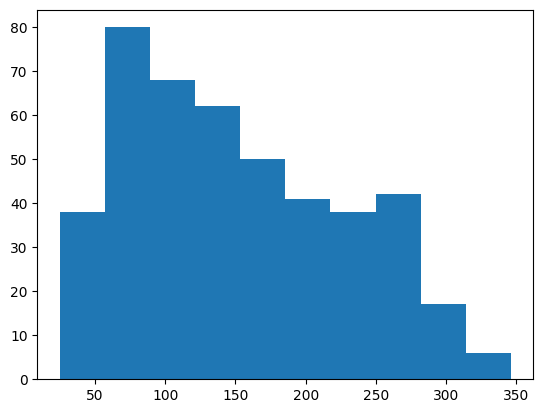

In [2]:
from matplotlib import pyplot as plt
plt.hist(diabetes_df['target'])
plt.show()

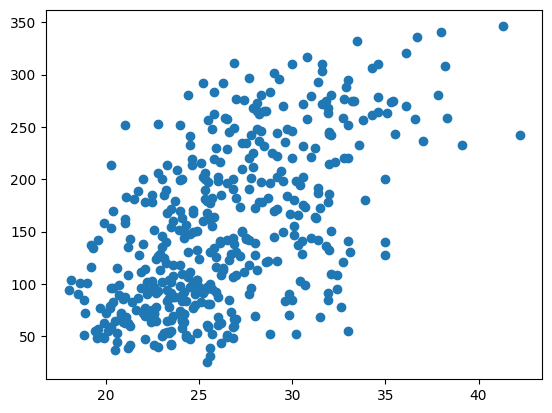

In [3]:
plt.scatter(diabetes_df['bmi'], diabetes_df['target'])
plt.show()

In [4]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


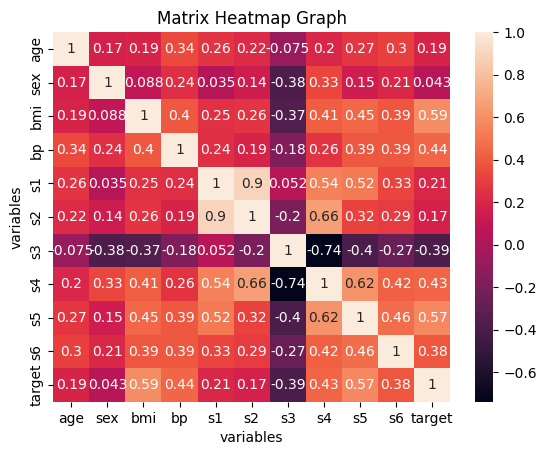

In [6]:
import seaborn as sn
sn.heatmap(diabetes_df.corr(), annot=True)
plt.title('Matrix Heatmap Graph')
plt.xlabel('variables') 
plt.ylabel('variables')

plt.show()

In [7]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


##### No. 4 Clean the data if needed, and explain your reasoning for your reader 

In [14]:
diabetes_df.dropna()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


##### No. 5 Split the dataset to a train (70%), validation (15%) and test (15%) sets 

In [15]:
from sklearn.model_selection import train_test_split
x = np.array(diabetes.data)[:, 2].reshape(-1,1)
y = np.array(diabetes.target)
#y = diabetes_df['target'].to_numpy()

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

##### No.6 Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [16]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_model(degree, X):
    # Use PolynomialFeatures to create polynomials as a new feature
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(x_test)
    x_val_poly = poly_features.transform(x_val)
    # Create a linear model
    model = LinearRegression()
    model.fit(X_poly, y_train)
    return model, X_poly, X_test_poly, x_val_poly, poly_features

regs = list()
for deg in (0, 1, 2, 3, 4, 5):
    regs.append(create_polynomial_model(deg, x_train))

##### No.7 Compare the six models using the training and validation data: 

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

for index, reg in enumerate(regs):
    y_pred = regs[index][0].predict(regs[index][2])
    print(f'Degree={index}, R^2={r2_score(y_test, y_pred):.2f}, MAPE={mean_absolute_percentage_error(y_test, y_pred):.2f}, MAE={mean_absolute_error(y_test, y_pred):.2f}')


Degree=0, R^2=-0.06, MAPE=0.60, MAE=59.85
Degree=1, R^2=0.39, MAPE=0.42, MAE=42.46
Degree=2, R^2=0.39, MAPE=0.42, MAE=42.45
Degree=3, R^2=0.39, MAPE=0.42, MAE=42.17
Degree=4, R^2=0.39, MAPE=0.42, MAE=42.40
Degree=5, R^2=0.39, MAPE=0.41, MAE=42.13


##### Conclusion: Based on the results of the individual metrics R^2, MAPE and MSE, the best model is the 6th model.

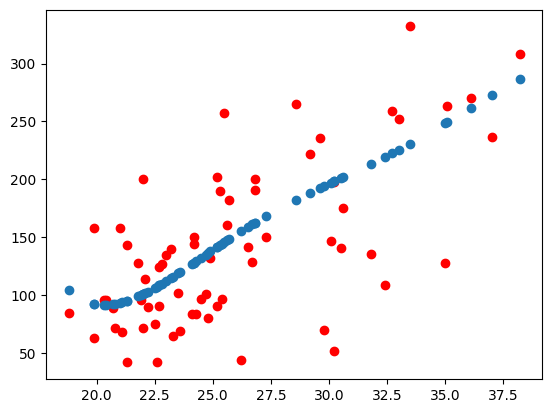

In [25]:
y_pred = regs[5][0].predict(regs[5][2])
plt.scatter(x_test, y_test, c='red')
plt.scatter(x_test, y_pred)
plt.show()

In [26]:
def print_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    # generate equation string:
    equation = f"y = {model.intercept_:.2f}"
    for ind, coeff in enumerate(model.coef_):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')
print_model_stats(regs[5][0])

Model: LinearRegression()
Coefficients: [ 0.00000000e+00 -2.50728706e+03  1.72399703e+02 -5.82012944e+00
  9.69635709e-02 -6.38244412e-04]
Intercept: 14367.58099722962
Equation: y = 14367.58 + 0.00x^1 + -2507.29x^2 + 172.40x^3 + -5.82x^4 + 0.10x^5 + -0.00x^6
***


In [27]:
regs[5][4].get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5'], dtype=object)